In [1]:
import sklearn

In [2]:
print(sklearn.__version__)

0.24.2


In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [4]:
x,y = load_breast_cancer(return_X_y = True)

In [5]:
x.shape

(569, 30)

In [6]:
y.shape

(569,)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [14]:
x_train.shape, y_train.shape

((426, 30), (426,))

In [15]:
x_test.shape, y_test.shape

((143, 30), (143,))

In [16]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [17]:
preds = clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,preds)

0.8811188811188811

In [18]:
from sklearn import tree

[Text(780.5357142857143, 770.1, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(498.2142857142857, 679.5, 'X[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(332.14285714285717, 588.9, 'X[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(199.28571428571428, 498.3, 'X[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(132.85714285714286, 407.7, 'X[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(66.42857142857143, 317.1, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(199.28571428571428, 317.1, 'X[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(132.85714285714286, 226.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(265.7142857142857, 226.5, 'X[1] <= 23.2\ngini = 0.067\nsamples = 29\nvalue = [1, 28]'),
 Text(199.28571428571428, 135.89999999999998, 'X[1] <= 22.385\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(132.85714285714286, 45.30000000000007, 'gin

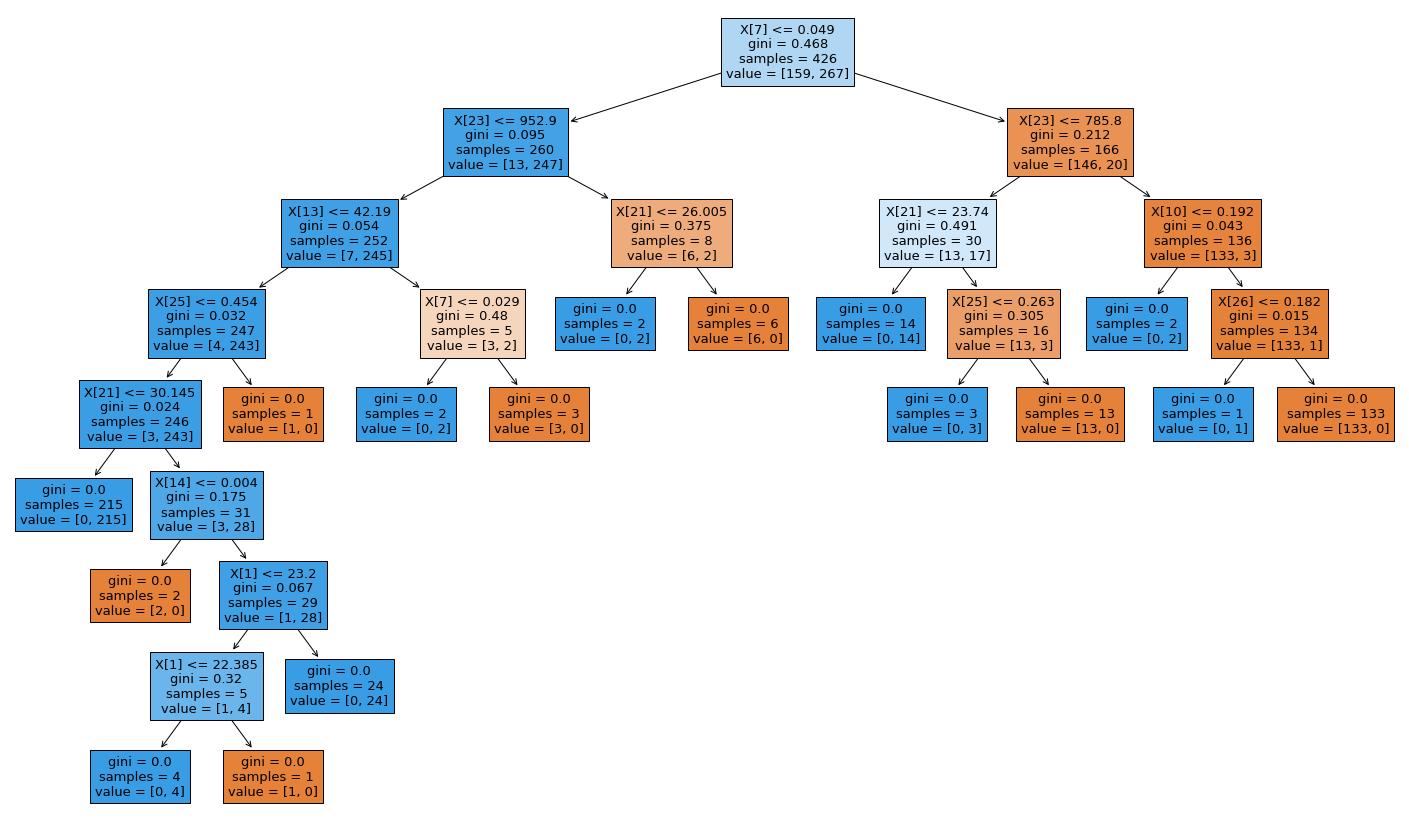

In [19]:
plt.figure(figsize=(25,15))
tree.plot_tree(clf,filled = True)

In [20]:
path = clf.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas, _ = path.ccp_alphas, path.impurities

In [21]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [25]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 0,ccp_alpha=ccp_alpha)
    clf.fit(x_train,y_train)
    clfs.append(clf)
    print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clf.tree_.node_count, ccp_alpha))

Number of nodes in the last tree is: 31 with ccp_alpha: 0.0
Number of nodes in the last tree is: 27 with ccp_alpha: 0.0022664723976040134
Number of nodes in the last tree is: 21 with ccp_alpha: 0.004647426339100881
Number of nodes in the last tree is: 19 with ccp_alpha: 0.004659799593581376
Number of nodes in the last tree is: 17 with ccp_alpha: 0.005633802816901408
Number of nodes in the last tree is: 15 with ccp_alpha: 0.007042253521126761
Number of nodes in the last tree is: 13 with ccp_alpha: 0.007841938420144537
Number of nodes in the last tree is: 11 with ccp_alpha: 0.009114019793328328
Number of nodes in the last tree is: 9 with ccp_alpha: 0.011443661971830986
Number of nodes in the last tree is: 7 with ccp_alpha: 0.018988002086593604
Number of nodes in the last tree is: 5 with ccp_alpha: 0.023141627543035996
Number of nodes in the last tree is: 3 with ccp_alpha: 0.03422474765119576
Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


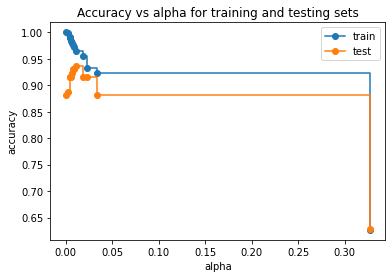

In [26]:
train_scores = [clf.score(x_train,y_train) for clf in clfs]
test_scores = [clf.score(x_test,y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [40]:
clf = DecisionTreeClassifier(ccp_alpha = 0.03)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03)

In [41]:
preds = clf.predict(x_test)

In [42]:
accuracy_score(y_test,preds)

0.916083916083916

[Text(558.0, 679.5, 'X[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(279.0, 407.69999999999993, 'gini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(837.0, 407.69999999999993, 'X[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(558.0, 135.89999999999998, 'gini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(1116.0, 135.89999999999998, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

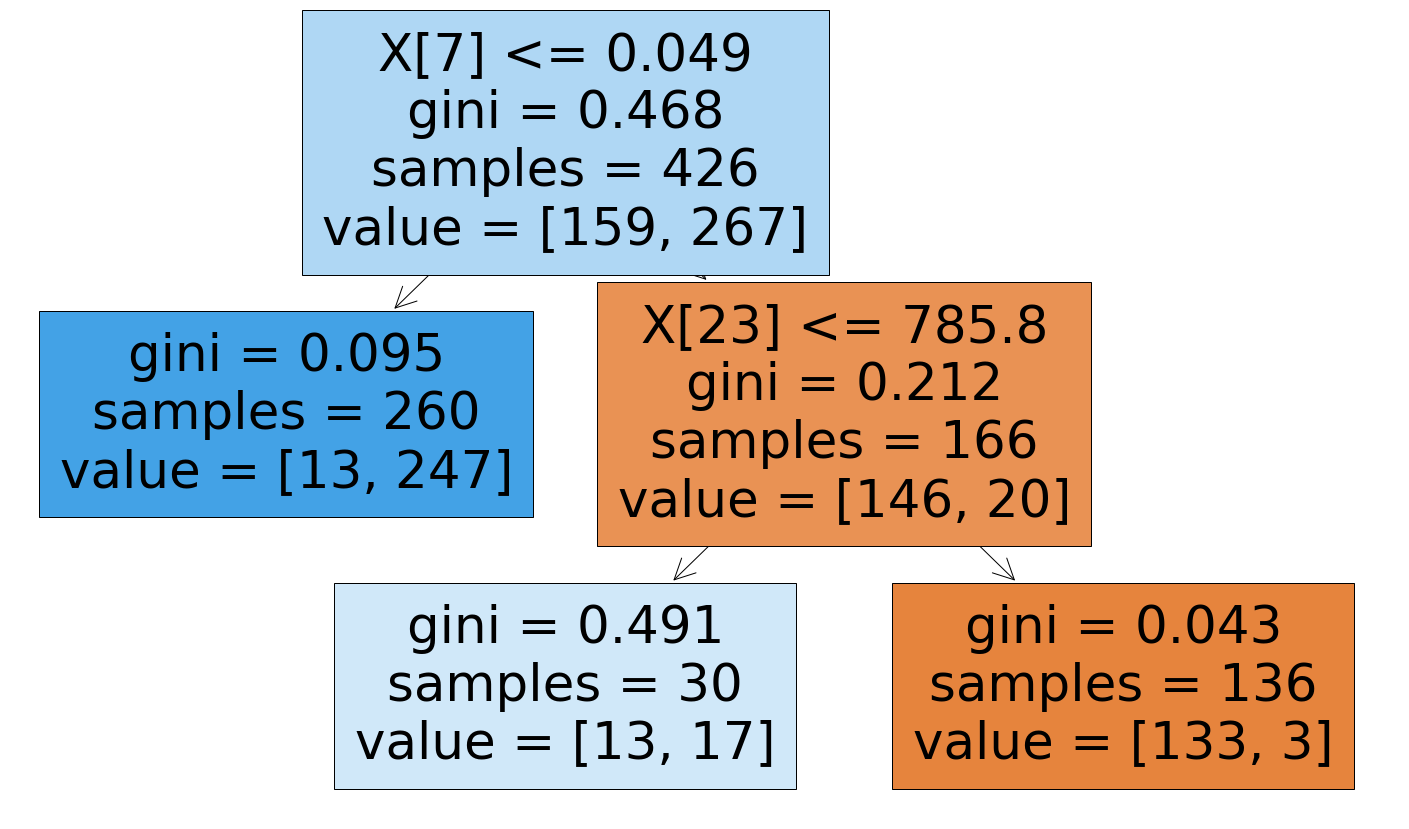

In [43]:
plt.figure(figsize = (25,15))
tree.plot_tree(clf,filled = True)